In [1]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model

## Functiile necesare pentru calcularea regresiei liniare

In [2]:
# Funcție pentru citirea datelor din fișier CSV
def load_data_from_csv(file_path, input_columns, output_column):
    inputs = []
    outputs = []
    
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        
        for row in reader:
            input_values = [1]  # Adăugăm '1' pentru interceptul (baza regresiei)
            for column in input_columns:
                input_values.append(float(row[column]))  # Adăugăm valorile de intrare (PIB, Libertate)
            inputs.append(input_values)
            outputs.append(float(row[output_column]))  # Adăugăm valoarea scorului de fericire (output)
    
    return inputs, outputs

# 1. Funcție pentru inversa unei matrice (folosind metoda Gauss-Jordan)
def inverse_matrix(matrix):
    n = len(matrix)
    augmented_matrix = [row[:] + [0]*n for row in matrix]  # Crează matricea augmentată [A | I]
    
    for i in range(n):
        augmented_matrix[i][i + n] = 1  # Adăugăm matricea unitate la matricea augmentată
        
    for i in range(n):
        # Normalizăm linia i
        if augmented_matrix[i][i] == 0:
            raise ValueError("Matrix is singular and cannot be inverted")
        
        pivot = augmented_matrix[i][i]
        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot
        
        # Eliminăm elementele de sub și deasupra pivotului
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j][i]
                for k in range(2 * n):
                    augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    # Extragem partea dreaptă a matricei augmentate ca fiind inversa
    return [row[n:] for row in augmented_matrix]

# 2. Funcție pentru calculul produsului matricial
def matrix_multiply(A, B):
    # A este o matrice m x n, iar B este o matrice n x p
    result = []
    for i in range(len(A)):
        result_row = []
        for j in range(len(B[0])):
            sum_val = sum(A[i][k] * B[k][j] for k in range(len(B)))
            result_row.append(sum_val)
        result.append(result_row)
    return result

# Funcție pentru calculul regresiei liniare
def linear_regression_from_csv(file_path, input_columns, output_column):
    # Citim datele din fișier
    inputs, outputs = load_data_from_csv(file_path, input_columns, output_column)
    
    # Calculăm X^T * X
    XT = [[inputs[j][i] for j in range(len(inputs))] for i in range(len(inputs[0]))]  # Transpunem matricea X
    XTX = matrix_multiply(XT, inputs)
    
    # Calculăm inversa lui X^T * X
    XTX_inv = inverse_matrix(XTX)
    
    # Calculăm X^T * Y
    XTY = matrix_multiply(XT, [[y] for y in outputs])
    
    # Calculăm coeficientii w = (X^T * X)^-1 * X^T * Y
    w = matrix_multiply(XTX_inv, XTY)
    
    return [row[0] for row in w]  # Returnează coeficientii

# 4. Funcție pentru a face predicții
def predict(X, w):
    return [sum(xi * wi for xi, wi in zip(x, w)) for x in X]

# 5. Funcție pentru a calcula eroarea (MSE - Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred)) / len(y_true)



## Functie pentru plotarea regresiei liniare:

In [3]:
# Funcție pentru a vizualiza regresia liniară în 3D (pentru 2 inputuri)
def plot_regression(inputs, outputs, w):
    fig = plt.figure(figsize=(10, 7))
    
    # Dacă avem 2 inputuri, vom crea un grafic 3D
    if len(inputs[0]) == 3:
        ax = fig.add_subplot(111, projection='3d')
        x1_vals = [x[1] for x in inputs]
        x2_vals = [x[2] for x in inputs]
        y_vals = outputs
        
        ax.scatter(x1_vals, x2_vals, y_vals, color='r', marker='o')
        
        # Crearea unei grile de predicție pentru 3D
        x1_range = np.linspace(min(x1_vals), max(x1_vals), 10)
        x2_range = np.linspace(min(x2_vals), max(x2_vals), 10)
        
        X1, X2 = np.meshgrid(x1_range, x2_range)
        Z = w[0] + w[1] * X1 + w[2] * X2 
        
        ax.plot_surface(X1, X2, Z, color='b', alpha=0.5)
        
        ax.set_xlabel('GDP per Capita')
        ax.set_ylabel('Freedom')
        ax.set_zlabel('Happiness Score')
        
        plt.show()
    
    # Dacă avem doar 1 input, vom crea un grafic 2D
    elif len(inputs[0]) == 2:
        plt.figure(figsize=(10, 6))
        
        x_vals = [x[1] for x in inputs]
        y_vals = outputs
        plt.scatter(x_vals, y_vals, color='r', label='Real data')
        
        # Crearea liniei de regresie
        y_pred = predict(inputs, w)
        plt.plot(x_vals, y_pred, color='b', label='Regression line')
        
        plt.xlabel('GDP per Capita')
        plt.ylabel('Happiness Score')
        plt.legend()
        
        plt.show()

Coeficientii:
w0 (interceptul): 3.203212767490186
w1 (coeficient PIB): 2044.0
w2 (coeficient Libertate): -4084.0
Eroare (MSE): 0.4524545222171923


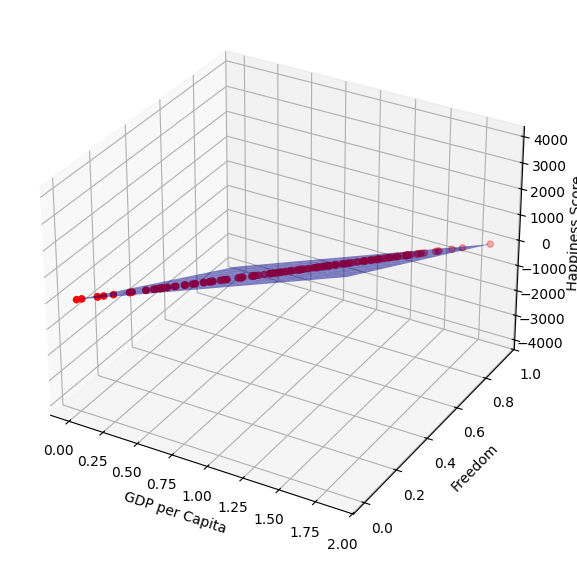

In [4]:
file_path = 'data/v2_world-happiness-report-2017.csv'  
input_columns = ['Economy..GDP.per.Capita.', 'Freedom'] 
output_column = 'Happiness.Score'  

w = linear_regression_from_csv(file_path, input_columns, output_column)

print("Coeficientii:")
print(f"w0 (interceptul): {w[0]}")
print(f"w1 (coeficient PIB): {w[1]}")
print(f"w2 (coeficient Libertate): {w[2]}")

inputs, outputs = load_data_from_csv(file_path, input_columns, output_column)

#Split data
np.random.seed(42)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

#Predicții pe baza modelului
test_predictions = predict(testInputs, w)

#Calculăm eroarea
error = mean_squared_error(testOutputs, test_predictions)
print(f"Eroare (MSE): {error}")

plot_regression(inputs, outputs, w)

Coeficientii:
w0 (interceptul): 3.203212682702116
w1 (coeficient PIB): 2.184184946415119
Eroare pe datele de test: 0.47366820783523544


<Figure size 1000x700 with 0 Axes>

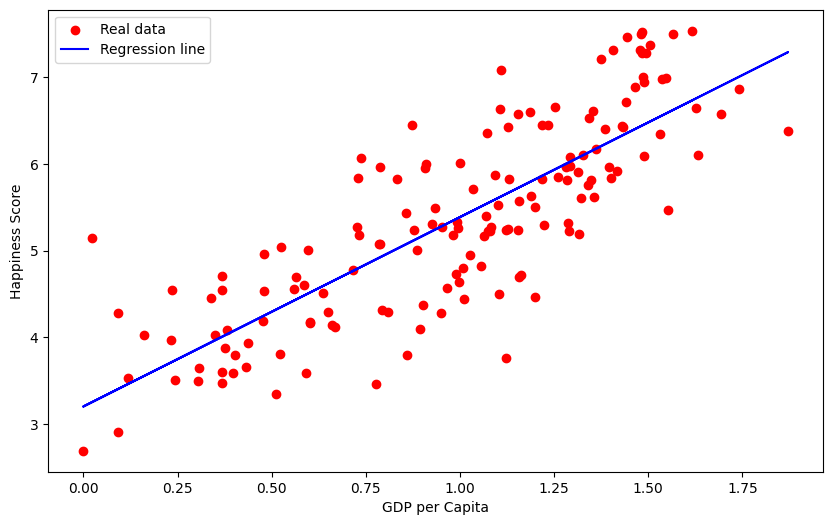

In [5]:
file_path = 'data/v2_world-happiness-report-2017.csv' 
input_columns = ['Economy..GDP.per.Capita.'] 
output_column = 'Happiness.Score'  

w = linear_regression_from_csv(file_path, input_columns, output_column)

print("Coeficientii:")
print(f"w0 (interceptul): {w[0]}")
print(f"w1 (coeficient PIB): {w[1]}")


inputs, outputs = load_data_from_csv(file_path, input_columns, output_column)

#Split data
np.random.seed(42)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

#Facem predicții pe setul de test
test_predictions = predict(testInputs, w)

#Calculăm eroarea pe datele de test (MSE)
error = mean_squared_error(testOutputs, test_predictions)
print(f"Eroare pe datele de test: {error}")
plot_regression(inputs, outputs, w) 


Coeficientii:
w0 (interceptul): 1.829832152567306
w1 (coeficient PIB): 2.9642475156757087
Eroare: 0.49125754864553145


<Figure size 1000x700 with 0 Axes>

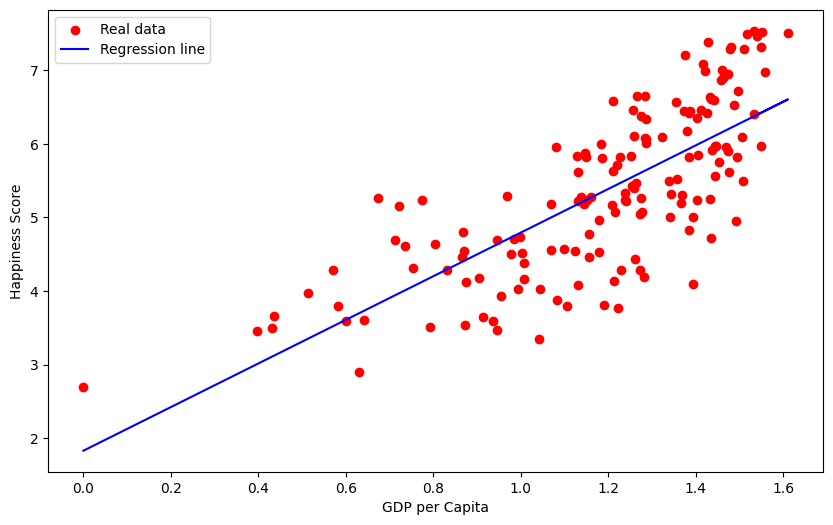

In [6]:
file_path = 'data/v2_world-happiness-report-2017.csv' 
input_columns = ['Family'] 
output_column = 'Happiness.Score'  

w = linear_regression_from_csv(file_path, input_columns, output_column)

print("Coeficientii:")
print(f"w0 (interceptul): {w[0]}")
print(f"w1 (coeficient PIB): {w[1]}")


inputs, outputs = load_data_from_csv(file_path, input_columns, output_column)

# Split data
np.random.seed(42)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

#Facem predicții pe setul de test
test_predictions = predict(testInputs, w)

#Calculăm eroarea pe datele de test
error = mean_squared_error(testOutputs, test_predictions)
print(f"Eroare: {error}")
plot_regression(inputs, outputs, w) 
